In [113]:
import pandas as pd

In [114]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is F01D-1899

 Directory of C:\Users\MY PC\Desktop\pl 4

02-03-2020  16:14    <DIR>          .
02-03-2020  16:14    <DIR>          ..
02-03-2020  15:38    <DIR>          .ipynb_checkpoints
02-03-2020  15:40            16,178 Admission_Predict_Ver1.1.csv
16-01-2020  09:40            30,286 auto-mpg.data
21-09-2019  13:06             5,205 candy-data.csv
31-01-2020  15:57            25,822 diabetes_data.csv
06-02-2020  10:24            91,562 different reg models.ipynb
30-01-2020  09:20             4,551 iris.data
30-01-2020  09:54            62,461 naive bayes.ipynb
02-03-2020  15:40            86,380 Sonar1.csv
06-02-2020  09:32             2,106 the-ultimate-halloween-candy-power-ranking.zip
02-03-2020  16:14            12,447 Untitled.ipynb
              10 File(s)        336,998 bytes
               3 Dir(s)  247,535,685,632 bytes free


In [115]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [116]:
df.columns = [c.replace(' ', '_') for c in df.columns]

In [117]:
df.describe()

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research,Chance_of_Admit_
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [118]:
df.drop(['Serial_No.'],axis=1,inplace=True)
# df1 = df.iloc[:, 1:-1]

In [119]:
df.isna().sum()

GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR_                 0
CGPA                 0
Research             0
Chance_of_Admit_     0
dtype: int64

In [121]:
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research,Chance_of_Admit_
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [123]:
y = df[df.columns[-1]].values

In [124]:
x = df.drop([df.columns[-1]],axis=1).values

In [125]:
x[:3]

array([[337.  , 118.  ,   4.  ,   4.5 ,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  ,   4.  ,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  ,   3.  ,   3.5 ,   8.  ,   1.  ]])

In [126]:
y[:3]

array([0.92, 0.76, 0.72])

In [127]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [128]:
from sklearn.model_selection import train_test_split as tts
xtr,xte,ytr,yte = tts(x,y,test_size=0.2)

In [129]:
from sklearn.linear_model import LinearRegression as lr

In [130]:
reg = lr().fit(xtr,ytr)

In [131]:
reg.score(xte,yte)

0.8165819669229839

In [132]:
import matplotlib.pyplot as plt

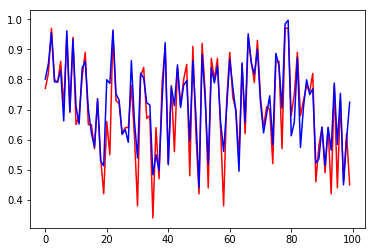

In [133]:
plt.plot(yte,color='r')
plt.plot(reg.predict(xte),color='b')

In [136]:
from sklearn.neural_network import MLPRegressor as mlr

In [145]:
reg = mlr(hidden_layer_sizes=(16,8,1),activation='relu',solver='adam').fit(xtr,ytr)

C:\Users\MY PC\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [143]:
reg.score(xte,yte)

-15.32124697768983

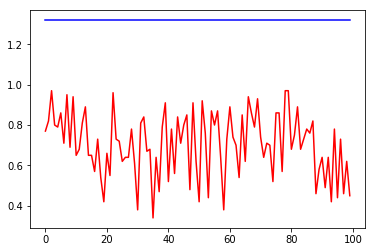

In [144]:
plt.plot(yte,color='r')
plt.plot(reg.predict(xte),color='b')